<a href="https://colab.research.google.com/github/Legodork13/Detecting-Fake-News/blob/main/Detecting_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import itertools
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import the dataset
df=pd.read_csv('/content/fake_news.csv')

In [ ]:
#display the dataset
df.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
count_df = pd.DataFrame(df['label'].value_counts()) # create a dataframe consisting of the count of feak and real
count_df.head()

,count
label,
REAL,3171
FAKE,3164


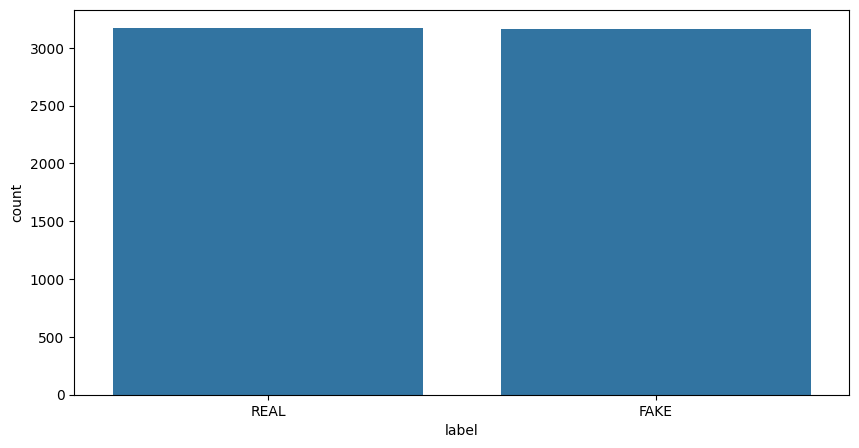

In [ ]:
#Displaying the graph
plt.figure(figsize=(10,5))
sns.barplot(x='label',y='count',data=count_df)
plt.show()

In [ ]:
#As you can see, the dataset is equally distributed with real and fake news, let's split the data into training and testing sets:
X=df['text']
Y=df['label']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [ ]:
print(f'{X_train.shape},{X_test.shape}')

(5068,),(1267,)


In [ ]:
X_train

,text
1142,Donald Trump received a key endorsement for hi...
2654,"Nina November 6, 2016 @ 2:39 pm \nPolish gover..."
5395,Time: Investigating Hillary is an Attack on Al...
1170,"Taki's Magazine October 28, 2016 \nThis electi..."
4371,Pakistan Pakistan's cricketer turned politicia...
...,...
3772,What happened was less a debate among contende...
5191,"Clinton, FBIGate and the true depth of the Oba..."
5226,"Fearing Election Day Trouble, Some US Schools ..."
5390,President Obama’s appearance at a town hall me...


In [ ]:
# Convert text data to TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Training a  model
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(X_train_tfidf,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [ ]:
# Prediction for test data
prediction=pac.predict(X_test_tfidf)

In [ ]:
# Model accuracy assessment
score=accuracy_score(y_test,prediction)
print(f'Точность:{score*100:.2f}%')

Точность:93.37%


In [ ]:
#confusion matrix
confusion_matrix(y_test,prediction, labels=['FAKE','REAL'])

array([[584,  44],
       [ 40, 599]])